# Classification
## Quick Detour, Nearest Neighbours

Before we use Scikit Learn (a library for doing machine learning), we'll quickly look at how we might write a nearest neighbour classifier by hand.

First we load some data. We have three arrays, x1, x2 with features and y with the corresponding classes of the objects.

We will use all but the last object to 'train' the nearest neighbour, and the last object to test it.

In [20]:
import numpy as np

#The nutrition data
x1=np.array([1,1,1,1,2,2,3,3,4,5,5,6,6,7,7,7,8,8])
x2=np.array([4,6,8,9,6,8,6,9,3,2,4,4,5,3,5,6,4,7])
y= np.array([1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])

Nearest neighbour simply involves calculating the **distance** from the test point, to all the training points. We can find the distance of a point $x_1, y_1$ from $x_2, y_2$ by using pythagoras: 
$$\mathtt{distance} = \sqrt{ (x_1-x_2)^2 + (y_1-y_2)^2}$$

We can get the test point (the last point in the lists):

In [8]:
test_zscore = x1[-1] #in python the -1 index means the end of the list
test_muac = x2[-1]
test_ok = y[-1]

We need to loop through all the training inputs, and find the distance from each to the test point: We want to find the training point that's got the smallest distance to the test point.

In [10]:
smallest_distance = np.infty #this variable remembers the smallest distance that we've seen so far.
result = np.NAN #this variable remembers the associated label for that training point.

for child_zscore, child_muac, child_ok in list(zip(x1,x2,y))[0:-1]: #this means we loop through all but the last child
    distance = np.sqrt((child_zscore - test_zscore)**2 + (child_muac - test_muac)**2) #get distance from test to muac
    if distance<smallest_distance: #if it's the smallest distance we've seen, use it.
        smallest_distance = distance #we update the smallest distance with this one
        result = child_ok  #we make a note of the label of this training point
        
print("The algorithm predicts that the test point has a label: '%s'" % result)
print("The test point actually has label: '%s'" % test_ok)

The algorithm predicts that the test point has a label: '2'
The test point actually has label: '2'


We'll be revisiting this dataset later, but we now turn to the 'digits' dataset and scikit learn.

# Classification with Scikit Learn

## The Digit Dataset

For these classification examples we will be using scikit-learn, a toolkit for python that contains lots of methods for solving machine learning problems.

It also contains some datasets we can try out. For this exercise we'll use the 'digit' dataset. This is a set of 1797 pictures of hand-drawn digits (0,1,2,3,4,5,6,7,8,9). The challenge is whether we can get the computer to learn what the digits look like, using a training set of images, and then test the computer on a test-set of images.

Run the code below to import the digits dataset.

In [15]:
from matplotlib import pyplot as plt #plotting library (lets us draw graphs)
%matplotlib inline

from sklearn import datasets #the datasets from sklearn


digits = datasets.load_digits() #load the digits into the variable 'digits'

In [16]:
datasets

<module 'sklearn.datasets' from '/home/albert/anaconda2/lib/python2.7/site-packages/sklearn/datasets/__init__.pyc'>

To get an idea of the data we are going to be classifying we'll ask what shape the 'data' matrix is:

In [17]:
digits.data.shape

(1797, 64)

This tells us that it has 1797 rows (which are the samples) and 64 columns (which are the 8x8 pixels in the data, and make up the 64 dimensions of the data set).

We can have a look at just one sample. Here I'm using python's matrix 'slicing' notation. It means I want row 35 and all the columns from that row.

In [18]:
digits.data[35,:]

array([  0.,   3.,  15.,   8.,   8.,   6.,   0.,   0.,   0.,   4.,  16.,
        16.,  16.,  13.,   2.,   0.,   0.,   3.,  16.,   9.,   2.,   0.,
         0.,   0.,   0.,   2.,  16.,  16.,  15.,   3.,   0.,   0.,   0.,
         0.,   7.,   6.,  12.,   9.,   0.,   0.,   0.,   0.,   0.,   1.,
        14.,  10.,   0.,   0.,   0.,   0.,   5.,  14.,  15.,   2.,   0.,
         0.,   0.,   1.,  15.,  14.,   1.,   0.,   0.,   0.])

Each of these numbers is one of the pixels in the image.

It's unclear what digit this image is of still.

We can draw the numbers as pixels in an image to see what image this represents:

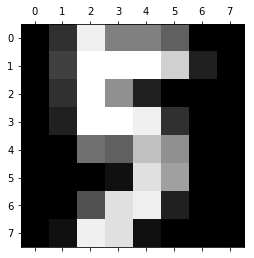

In [19]:
#code to reshape the 64 numbers into an 8x8 matrix and then draw it
plt.matshow(digits.data[35,:].reshape(8,8),cmap='gray') 

It looks like a five!

**Exercise 1:** Copy the code above into the box below, and modify it to find out what digit image 72 has inside

In [39]:
 
#Exercise 1: Your code here!






The problem is a **supervised** learning problem, which means we need to provide labels for our data points.

The labels are also in the 'digits' object. They can be accessed using 'target':

In [13]:
digits.target[35]

5

As suspected image 35 is of the digit '5'.

**Exercise 2**: What is image 72 supposed to be? Copy and alter the code above to find out.

In [41]:

#Exercise 2: Your code here!



**Exercise 3**: How many digits are of each type in the dataset?

You can plot a histogram with the following code:

    plt.hist(list_of_numbers,bins=range(11))
    
You'll need to replace "list_of_numbers" with the array you want to draw the histogram of.

The bins parameter tells the function where to draw the boundaries of the graph. We want them at each integer.    

## Scikit Learn
In the following we'll be using the scikit library to do the classification. We need to go through two steps: **training** (fitting) and **testing** (prediction).

## Training

First we need to pick some training data:

In [15]:
training_data = digits.data[0:-10,:] #this means all but the last 10 rows should be put in training_data
training_target = digits.target[0:-10] #this puts all but the last 10 elements of the labels (targets) into training_target

#similarly this takes the last digit and puts that in test_data and test_target
test_data = digits.data[-10:,:]
test_target = digits.target[-10:]

The training step is quite simple. Here we fit the model to the data.

In [17]:
from sklearn import neighbors #import the library that we need
nn = neighbors.KNeighborsClassifier(n_neighbors=1) #this is our model (with just one nearest neighbour)
nn.fit(training_data,training_target); #fit our model to the training data

We can then predict the results using the predict method

In [32]:
#

'auto'

In [18]:
nn.predict(test_data)

array([5, 4, 8, 1, 4, 9, 0, 8, 9, 8])

How many of these were correct?

In [19]:
test_target

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

Remarkably the classifier has mostly got them correct.

Below is the image that it misclassified

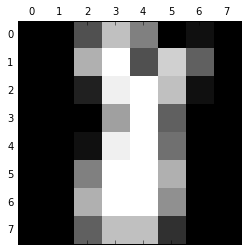

In [20]:
plt.matshow(test_data[3].reshape(8,8),cmap='gray') 

**Exercise 4**: What was the image supposed to be, and what did the classifier think it was?

In [48]:

#Exercise 4: Answer here





## Cross-validation

In the lecture I briefly mentioned leave-one-out cross-validation. The same sort of idea is called **k-fold cross-validation**. In this we split the dataset into *k* groups, and train on all but one, then test on the remaining one. Then repeat while leaving out a different group.

sklearn provides the 'KFold' object to let us organise our cross-validation. In the code below we repeatedly train and test, and report the accuracy in each fold.

**Exercise 5**: In the code below try different classifiers and see which one does best. Try modifying the parameters to see what effect they have (e.g. the number of neighbours). Put the cursor inside the parameter brackets (e.g. on the "n_neighbors=1") and press SHIFT-TAB a couple of times and a box will appear describing what the different parameters do.

In [21]:
import numpy as np

#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.cross_validation import KFold

#prepare k-fold cross validation
kf = KFold(len(digits.target), n_folds=5)
KFold(n=4, n_folds=2, shuffle=False, random_state=None)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf:
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = digits.data[train_index,:] 
    training_target = digits.target[train_index] 
    test_data = digits.data[test_index,:]
    test_target = digits.target[test_index]
    
    #TODO: Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=50, min_samples_split=1, max_depth=None, max_features=16)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=8)
    csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    #csf= svm.LinearSVC(C=0.05) #Linear Support Vector Machine classifier
    #csf = naive_bayes.GaussianNB()
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print(" ")
print("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

346 of 360 correct
343 of 360 correct
347 of 359 correct
355 of 359 correct
343 of 359 correct
 
Total: 1734 of 1797 correct (96.49%)


The nearest neighbour classifier did particularly well on the digits dataset. 

### Breast Cancer Dataset

This is the wisconsin Breast Cancer dataset. It contains measurements of different cells, some of which are cancerous and some of which are not. It's been organised in the same way as before, with bc.data containing a matrix, each row is a cell, each column a feature.

In [22]:
bc = datasets.load_breast_cancer()

bc.data[4,:] #data from row number four.

array([  2.02900000e+01,   1.43400000e+01,   1.35100000e+02,
         1.29700000e+03,   1.00300000e-01,   1.32800000e-01,
         1.98000000e-01,   1.04300000e-01,   1.80900000e-01,
         5.88300000e-02,   7.57200000e-01,   7.81300000e-01,
         5.43800000e+00,   9.44400000e+01,   1.14900000e-02,
         2.46100000e-02,   5.68800000e-02,   1.88500000e-02,
         1.75600000e-02,   5.11500000e-03,   2.25400000e+01,
         1.66700000e+01,   1.52200000e+02,   1.57500000e+03,
         1.37400000e-01,   2.05000000e-01,   4.00000000e-01,
         1.62500000e-01,   2.36400000e-01,   7.67800000e-02])

You can find out more by running this code:

In [23]:
print(bc['DESCR']) #uncomment and run to print a description of the dataset

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

**Exercise 6:** Quickly try out different classifiers for the breast cancer dataset. Do the same ones do as well? If not, why not?

In [24]:
bc = datasets.load_breast_cancer()

import numpy as np
#classification libraries
from sklearn import neighbors
from sklearn import svm
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble

from sklearn.cross_validation import KFold

#prepare k-fold cross validation
kf = KFold(len(bc.target), n_folds=5)
KFold(n=4, n_folds=2, shuffle=False, random_state=None)

#variables to count up how many we got right
tally_correct = 0
tally_total = 0
for train_index, test_index in kf:
    #here we split the dataset up into training and test sets, these change each iteration
    training_data = bc.data[train_index,:] 
    training_target = bc.target[train_index] 
    test_data = bc.data[test_index,:]
    test_target = bc.target[test_index]
    
    #TODO: Uncomment one of these classifiers to see how it does
    #csf = tree.DecisionTreeClassifier()
    #csf = ensemble.RandomForestClassifier(n_estimators=10, min_samples_split=1, max_depth=None, max_features=5)
    #csf = ensemble.ExtraTreesClassifier(n_estimators=100, min_samples_split=1, max_depth=None, max_features=2)
    csf = neighbors.KNeighborsClassifier(n_neighbors=1)
    #csf= svm.LinearSVC(C=1)
    #csf = naive_bayes.GaussianNB()
    
    
    csf.fit(training_data,training_target)
    
    predictions = csf.predict(test_data)
    number_correct = np.sum(predictions==test_target)
    total_number = len(predictions)
    print("%d of %d correct" % (number_correct,total_number))
    tally_correct += number_correct
    tally_total += total_number
print(" ")
print("Total: %d of %d correct (%0.2f%%)" % (tally_correct, tally_total, 100.0*tally_correct/tally_total))

97 of 114 correct
102 of 114 correct
109 of 114 correct
104 of 114 correct
104 of 113 correct
 
Total: 516 of 569 correct (90.69%)


**Bonus Exercise**: Look at the other datasets in sklearn, and try out other classifiers on them. What datasets do you know of or have access to which might need classification?

**Double Bonus Exercise**: Modify the classifier code above so that it tries different values of the neighbours parameter automatically, and returns the best value of that parameter.

**Quick Quiz**

How can we avoid 'cheating' when we fit (or 'train') our model?

Name two types of classifier.

What is over fitting?

Name some features of a dataset which make one classifier work better than another?

What is the difference between supervised and unsupervised learning?